# Поговорим о том что такое сокрытие персональных данных

Для того чтобы скрыть некоторые файлы или данные нашего проекта, например как API-ключи, достпы к серверам, пароли, и прочее, мы должны использовать файл общего окружения, который при отправке в репозиторий гитхаба игнорируется(его отправка).

Есть 2 подхода для хранения, собственных данных о проекте
1. **Встроенные переменные** - это переменные которые мы создаем внутри нашего кода и используем их в разных местах программы. Они не могут быть видны другим программистам или пользователям.
**<u>ЭТО НЕБЕЗОПАСНЫЙ ПОДХОД ИМ МЫ ПРИ КОММЕРЧЕСКОЙ РАЗРАБОТКЕ НЕ ПОЛЬЗУЕМСЯ</u>**

2. **Файлы общего окружения(env(-ironment))** - это файлы, которые хранят наши данные и ключи, которые мы хотели скрыть. Эти файлы обычно используются для конфиденциальных данных и должны быть отправлены в репозиторий гитхаба.



Рассмотрим 2ой подход. На прошлом занятии мы уже разбирали конфигурационную папку которая отвечает за базовые настройки программы.

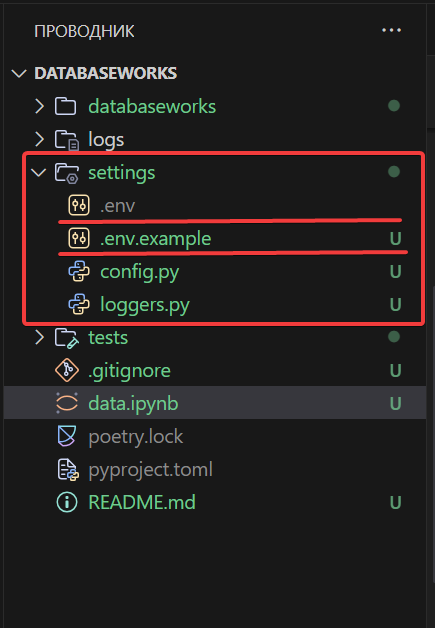

В этой же папке мы и определим наши файлы общего окружения(env) которые хранят наши данные и ключи, которые мы хотели скрыть. 


Прописывается в этих файлах все в таком формате:
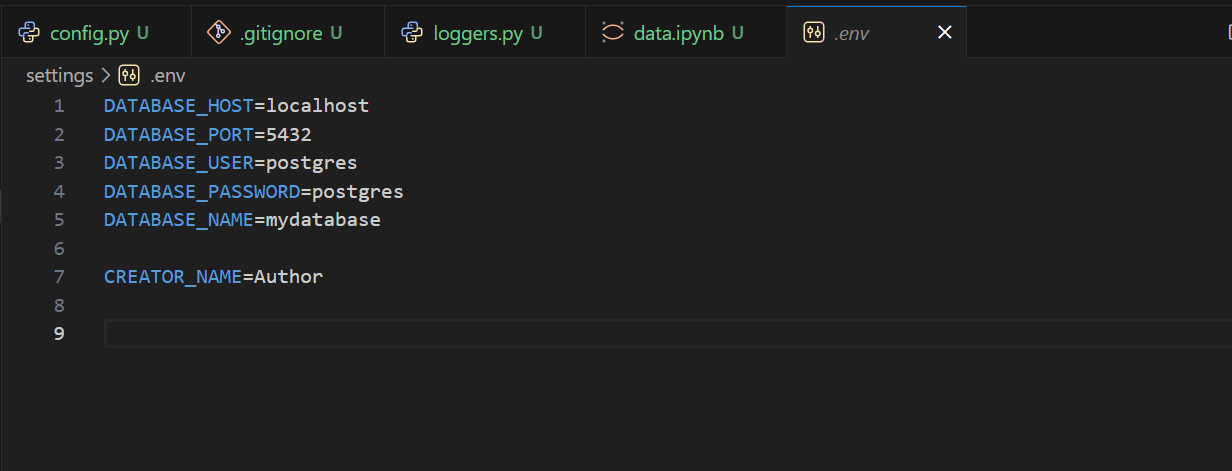

Также для того чтобы у другого пользователя или у нас самих можно было легко повторить файл переменных окружения мы создаем шаблонный файл аналогичный .env но его мы называем .env.example и в него мы просто добавляем все наши переменные ПРИ ЭТО ДАННЫЕ ПОСЛЕ РАВЕНСТВА НЕ ДОЛЖНЫ БЫТЬ ТАКИМИ ЖЕ КАК В .env 

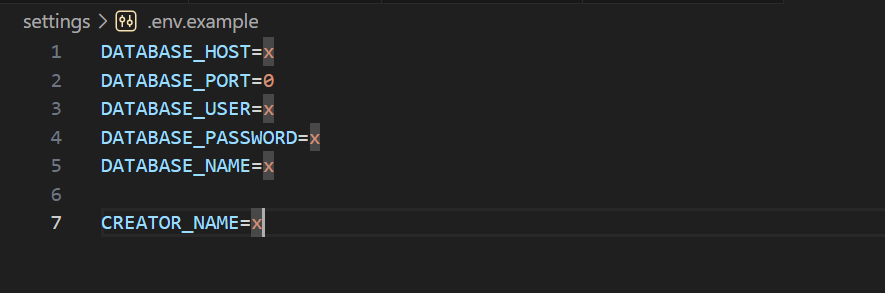


Как мы подключаем эти переменные окружения, чтобы они работали во всём нашем проекте?

Для начала создадим файл config.py в папке settings

Далее нам поможет такая библиотека как pydantic_settings. Эта библиотека понадобится нам для того чтобы создать класс-конфигуратор который будет автоматически подтягивать все наши переменные окружения из файла .env и использовать их в нашем проекте.

Для этого мы просто импортируем класс BaseSettings из pydantic_settings и создаём свой класс, который наследуется от BaseSettings. В этом классе мы определяем все наши переменные окружения как атрибуты класса и выделяем их типы. 




In [ ]:
import os
from pydantic_settings import BaseSettings, SettingsConfigDict


class Settings(BaseSettings):
    # Database
    DATABASE_HOST: str
    DATABASE_PORT: int
    DATABASE_USER: str
    DATABASE_PASSWORD: str 
    DATABASE_NAME: str 
    DATABASE_SQLITE: str = ''
    
    # Other
    CREATOR_NAME: str
    
    model_config = SettingsConfigDict(
        env_file=os.path.join( os.path.dirname(os.path.abspath(__file__)), '.env'), 
        env_file_encoding='utf-8'
        )

Если большенство описаных вещей нам ещё более менее понятно то запись

```python
model_config = SettingsConfigDict(
        env_file=os.path.join( os.path.dirname(os.path.abspath(__file__)), '.env'), 
        env_file_encoding='utf-8'
        )
```
Вызывает некоторые трудности бри разбре.

**SettingsConfigDict** - это класс который подтягивает данные из файла и записывает их в классовые атрибуты нашего класса-конфигуратора.




Рассмотрим как происходит подключение к файлу. Как всегда как и любая программа мы начинаем с вложенных скобок.

`__file__` - мета-переменная, которая существует для любого python файла, и хранит путь до исполняемого файла, включая сам файла. Работает только в .py файлах

`os.path.abspath(__file__)`  -- abspath - функция библиотеки `os` из пакета `path` которая прописывает нам полный путь до рабочего файла

`os.path.dirname(  os.path.abspath(  __file__  )  )` -- dirname - функция библиотеки `os` из пакета `path` которая возвращает имя директории, содержащей указанный файл. В данном случае это будет путь до файла в котором был произведен запуск программы.

`os.path.join( os.path.dirname(os.path.abspath(__file__)), '.env')` -- join - функция библиотеки `os` из пакета `path` которая объединяет несколько путей в один. В данном случае это будет путь до файла `.env`, который находится в директории, содержащей исполняемый файл программы (в нашем случае это будет путь до settings/config.py).




In [ ]:

settings = Settings()

Далее когда класс и переменные а также подключение файла к классу готово, нам нужно организовать инициализацию экземпляра класса-конфигуратора чтобы иметь прямой доступ к нашим данным

Так например. Мы можем полуить имя автора, находясь в main.py просто хоть как либо взаимодействовав с config.py

In [3]:
# main.py
from settings.config import settings

print(f'{settings.CREATOR_NAME=}')

settings.CREATOR_NAME='Author'


Как видим доступ к файлу окружения настроен. 


На самом деле, это не единственный способб для подключенния переменных окружения, также есть вариант через стандартные модули os и sys. Или например через dot_env. Его реализации можно легко найти в  интернете, по записи они конечно куда короче чем такой вариант, но подход через pydantic_settings является структурно правильнее чем эти методы

In [6]:
# Пример через load_dotenv c подключение /settings/.env относительно корня проекта
import os, sys
from dotenv import load_dotenv
load_dotenv(os.path.join(os.path.dirname(os.path.abspath(__file__)), 'settings', '.env'))
print(f'{os.getenv("CREATOR_NAME")=}')



NameError: name '__file__' is not defined